# Практическая работа №3: Статистический анализ социальных сетей.
Выполнил студент гр. 0383 Емельянов Дмитрий. Вариант №53

## Цель работы
Овладеть навыками работы с математическими пакетами для статистического анализа социальных сетей.

## Основные теоретические положения

**Диада** — элемент сети, представляющий собой пару акторов и (возможную) связь между ними: $D_{ij}=(X_{ij}, X_{ji}), i\neq j$.

**Цензус диад** — тройка чисел $<M, A, N>$, где:

$M $(mutual) $= \sum_{i<j} X_{ij} X_{ji}$, количесво взаимных диад (дуги от обоих акторов);

$A$ (asymmetric) $= X_{++} - 2M$, количество асимметричных диад (дуга только от одного актора);

$N$ (null) $= C^2_g - A - M$, количество нулевых диад (акторы не связаны).

**Индекс взаимности Каца-Пауэлла** — характеристика измерения тенденции акторов в группе. Данный индекс оценивает тенденцию акторов в группе к взаимному выбору друг друга. 

Индекс взаимности основан на ожидании количества взаимных диад, предполагая, что выбор делается акторами случайным образом.

Для фиксированного выбора из $d$ акторов:
*  $P(i \rightarrow j \wedge j \rightarrow i) = \frac{d}{g - 1}\left( \frac{d}{g - 1} + \rho_{KP} \frac{g - 1 - d}{g - 1} \right).$
*  $\hat{\rho}_{KP} = \frac{2(g-1)M - gd^2}{gd(g - d - 1)}$ - оценка по методу моментов.



Для свободного выбора:
* $P = \frac{x_{i+}x_{j+}}{(g - 1)^2}.$
* $\hat{\rho}_{kp} = \frac{2(g-1)^2M - L^2 + L_2}{L(g - 1)^2 - L^2 - L_2}$ - оценка по методу моментов.



**Индекс взаимности Бандиопадхьяйя** — индекс, основанный на максимальном и минимальном значениях количества диад в сети. 

$\rho_B = \frac{M - M_{\min}}{M_{\max} - M_{\min}},$

* $M_{\min} = \max f(t), 0 \leq t \leq g$, 

* $M_{\max} = \lfloor \frac{1}{2} \sum^g_{i = 1} x_{i+} - \max g(t)\rfloor, 0 \leqslant t \leqslant g,$

* $f(t) = \sum^t_{i=1} x_{i+} - t(g - 1) - C^2_g,$

* $g(t) = \sum^t_{i=1} x_{i+} - t(t - 1) - \sum^g_{i=t+1} \min (t, x_{i+}).$

**Вычисление доверительного интервала для оценки P.**

$\hat{P} = \displaystyle{\frac{\sum_{i = 1}^g \sum_{j = 1}^g x_{ij}}{g(g-1)} = \frac{l}{g(g - 1)}}.$


$\hat{P} \in [\hat{P} - z_{\alpha/2} \sqrt\frac{\hat{P}(1- \hat{P})}{g(g-1)}; \hat{P} + z_{\alpha/2} \sqrt\frac{\hat{P}(1- \hat{P})}{g(g-1)}],$

$z_{\alpha/2}: \Phi(z_{\alpha/2}) = 0.5 - \frac{\alpha}{2}$, где $\alpha - $ уровень значимости

## Постановка задачи
С помощью математических пакетов и соответствующих библиотек провести статистический анализ случайно смоделированного ориентированного графа. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы


In [ ]:
library(igraph)
library(statnet)

## 1) Моделирование случайного графа
С помощью библиотеки igraph смоделировать случайный орграф $G_d$ на основе модели Эрдеша—Реньи: $G_d=G(g, p)$, где $g$ – количество акторов, $p$ – вероятность появления дуги между акторами. В R для модели случайного графа Эрдеша—Реньи существует функция erdos.renyi.game(). Ознакомьтесь с данной моделью и опишите её.  

Вариант 54: $g=89, p=0.75$

In [5]:
set.seed(1000) # Задаем ядро генерации, чтобы получать детерминированный результат при разных запусках

g <- 89
p <- 0.75
graph <- erdos.renyi.game(g, p, "gnp", directed = T)
net <- network(as_adjacency_matrix(graph), directed = T)

<sparse>[ <logic> ] : .M.sub.i.logical() maybe inefficient



## 2) Отображение графа
Отобразить полученный орграф.

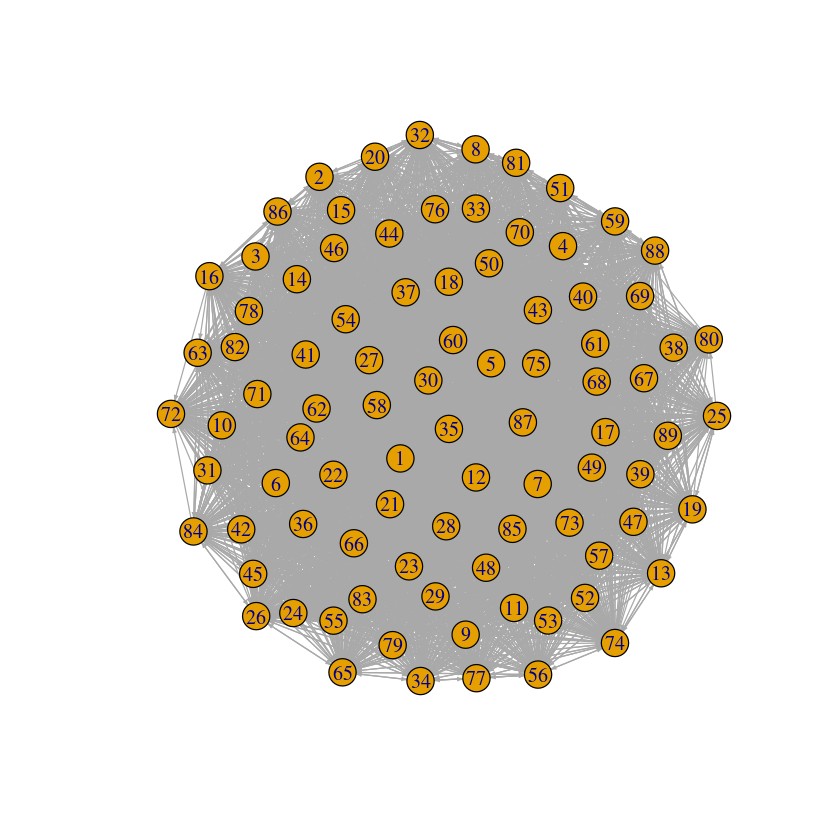

In [13]:
plot(graph, layout = layout_with_fr, 
     vertex.label = V(graph)$name,
     vertex.size = 10, 
     edge.arrow.size=.2)

Граф получился очень плотным на рисунке — это объясняется большим количеством вершин и достаточно высокой плотностью графа (ожидаемая плотность графа — 0.75).

## 3) Вычислить «пятичисловую сводку» для графа $G_d$


In [15]:
cat("Размер сети: ", network.size(net), "\n")
cat("Плотность сети: ", gden(net), "\n")
cat("Число компонент: ", components(net), "\n")
cat("Диаметр сети: ", diameter(graph), "\n")
cat("Коэффициент кластеризации: ", gtrans(net, mode = "graph"), "\n")
     

Размер сети:  89 
Плотность сети:  0.7565117 
Число компонент:  1 
Диаметр сети:  2 
Коэффициент кластеризации:  0.7570584 


Плотность сети получилась близкой к $p=0.75$, что достаточно логично, так как:   
Если L — случайная величина, количество дуг в орграфе, с учетом модели, имеет распределение $L \sim B(g(g-1), P_0)$, то $\mathbb{E}(L) = P_0 \cdot g(g-1)$. Подставляем в формулу плотности сети: 
$\Delta = \frac{L}{g(g-1)} = \frac{P_0 \cdot g(g-1)}{g(g-1)} = P_0$

Число компонент оказалось равно одному — учитывая такое большое количество акторов, вероятность вершины быть изолированной практически нулевая.

Интересно, что диаметр сети оказался равен 2. Сеть вышла достаточно плотной, поэтому логично, что от каждого актора можно дойти до другого не более чем за 2 ребра.

Коэффициент кластеризации оказался достаточно большим из-за высокого значения $p=0.75$, причем он близок к $p$. Это объясняется тем, что вероятность наличия ребра $A -> C$ при наличии ребер $A -> B, B -> C$ независима и равна $p=0.75$.

## 4) Вычислить цензус диад. Сделать выводы.

In [16]:
census <- dyad_census(graph)
census

$mut
[1] 2261

$asym
[1] 1403

$null
[1] 252

В сети довольно большое количество взаимных диад, чуть поменьше асимметричных, и совсем мало нулевых. Это соотносится с тем, что плотность сети довольно высокая  — 0.75.  
Заметим, что доля нулевых диад равна $\frac{252}{252+1403+2261} = 0.06435$, а вероятность того, что между двумя акторами не возникнет ребёр с обоих сторон равна $(1-p) \cdot (1-p)=0.25 \cdot 0.25 = 0.0625$. Можно заметить близость данных значений.  
Аналогичный анализ можно провести для доли ассиметричных диад: $\frac{1403}{252+1403+2261} = 0.35$, вероятность ровно одного ребра между акторами равна $0.75 \cdot 0.25 + 0.25 \cdot 0.75 = 0.375$.  
Доля взаимных диад: $\frac{2261}{252+1403+2261} = 0.57737$, вероятность двунаправленного ребра = $0.75^2 = 0.5625$.

Как можно заметить, доли соответствующих видов диад близки к "теоретическим" значениям, то есть вероятностей наличия соответствующего количества ребёр между акторами.

## 5) Оценка индекса взаимности Каца-Пауэла
Вычислить оценку индекса взаимности Каца—Пауэла при фиксированом выборе акторов d и при свободном выборе. Сделать выводы.

Пусть $d=66$, так как $g \cdot p=89\cdot0.75=66.75$.

In [57]:
d <- 66
M <- census$mut
# испольузем оценку метода моментов
rho_kp <- (2*(g-1)*M - g * d^2)/(g*d*(g - 1 - d))
rho_kp

[1] 0.07933265

Если считать, что каждый актор выбирает фиксированное число 66 акторов из 89, то индекс взаимности по оценке получается близок к нулю. 

Рассмотрим свободный выбор:


In [61]:
X <- as.matrix(as_adjacency_matrix(graph))
L <- sum(rowSums(X))
L2 <- sum(rowSums(X)^2)

rho_kp_free <- (2*(g - 1)^2 * M - L^2 + L2)/(L*(g - 1)^2 - L^2 + L2)
rho_kp_free

[1] 0.02763162

Для свободного выбора значение также близко к нулю.  

Значения в обоих случаях получились равны 0, так как было взято, грубо говоря, матожидание "количества выбранных акторов" (если вероятность появления дуги 0.75, то матожидание количества выбранных акторов - 66). То есть взаимность между акторами определеяется случайным образом, что выражается в близких к нулями значеним.

## 6) Вычислить вероятность того, что связь будет взаимной для каждого случая

In [62]:
#Вероятность для фиксированного выбора
P_fix <- (d / (g-1)) * ((d/(g-1)) + rho1*(g - 1 - d) / (g - 1))
P_fix

[1] 0.6597311

In [64]:


#Вероятность для свободного выбора
P_free <- (rowSums(X) * colSums(X))/(g - 1)^2
P_free_avg <- sum(P_free)/g
P_free_avg
     


[1] 0.57242

Вероятность при фиксированном выборе составляет около $0.66$, при свободном - $0.57$, то есть немного чаще связь является взаимной. Значение 0.57 соотносится с долей взаимных диад в пункте 4.

## 7) Вычислить индекс взаимности Бандиопадхьяйя. Сделать выводы.

In [71]:
f_t <- c(0:g)
g_t <- c(0:g)
for (t in c(0:g))
  f_t[t+1] <- sum(rowSums(X)[1:t]) - t*(g-1) - choose(t, 2)
M_min <- max(f_t)

for (t in c(0:g))
  g_t[t+1] <- sum(rowSums(X)[1:t] - t*(t-1)) - sum(min(t, rowSums(X)[t+1:g], na.rm = TRUE))
M_max <- floor(1/2*sum(rowSums(X))-max(g_t))

(M - M_min)/(M_max - M_min)

[1] 0.8269085

Значение данного индекса получилось заметно выше предыдущего. Данный индекс относительно близок к значению $p=0.75$

## 8) Проверка нулевой гипотезы, 0.5
Проверить нулевую гипотезу о том, что число дуг $L$ в орграфе $G_d$ имеет биномиальное распределение $L ∼ Bin(g(g − 1), \frac{1}{2})$ при уровне значимости $\alpha = 0.01$. Определить максимальный уровень значимости, при котором нулевая гипотеза не отвергается.

In [73]:
l <- sum(X)
binom.test(l, g*(g-1), p = 0.5)


	Exact binomial test

data:  l and g * (g - 1)
number of successes = 5925, number of trials = 7832, p-value < 2.2e-16
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.7468484 0.7659839
sample estimates:
probability of success 
             0.7565117 


Полученный p-value < $2.2 \cdot 10^{-16}$, то есть нулевая гипотеза не выполняется - ее можно отвергнуть. Так как p-value является максимальным уровнем значимости, при котором гипотезу не отвергают, в данном случае максимальный уровень значимости очень мал и меньше $2.2 \cdot 10^{-16}$.

## 9) Проверка нулевой гипотезы, $P_0$
Проверить нулевую гипотезу о том, что число дуг $L$ в орграфе $G_d$ имеет биномиальное распределение $L ∼ Bin(g(g−1), P_0), P_0 = 0.72$ при уровне значимости $\alpha = 0.01$. Определить максимальный уровень значимости, при котором нулевая гипотеза не отвергается.

In [82]:
binom.test(l, g*(g-1), p = 0.72)


	Exact binomial test

data:  l and g * (g - 1)
number of successes = 5925, number of trials = 7832, p-value =
3.097e-13
alternative hypothesis: true probability of success is not equal to 0.72
95 percent confidence interval:
 0.7468484 0.7659839
sample estimates:
probability of success 
             0.7565117 


Аналогично проверке $P_0=1/2$, нулевая гипотеза отвергается, так как p-value очень мал $<3.097\cdot10^{-13}$. Максимальный уровень значимости, при котором нулевая гипотеза не отвергается, меньше $3.097\cdot10^{-13}$.

Проверим значение $P_0$, близкое к $P=0.75$, возьмем $P_0=0.745$.

In [83]:
binom.test(l, g*(g-1), p = 0.745)


	Exact binomial test

data:  l and g * (g - 1)
number of successes = 5925, number of trials = 7832, p-value = 0.01963
alternative hypothesis: true probability of success is not equal to 0.745
95 percent confidence interval:
 0.7468484 0.7659839
sample estimates:
probability of success 
             0.7565117 


В данном случае отклонить нулевую гипотезу нельзя - p-value больше уровня значимости $\alpha=0.01$.

## 10) Доверительный интервал
Построить доверительный интервал для оценки параметра $p$ с доверительной надёжностью $(1-\alpha)$. Сделать выводы.

In [88]:
p_hat <- (sum(X))/(g*(g-1))
p_hat

[1] 0.7565117

Для $\alpha=0.01$ исходя из таблицы функции Лапласа находим $z_{\alpha/2} \approx 2.58$.

In [93]:
z_a <- 2.58
interval <- z_a * sqrt((p_hat * (1 - p_hat))/(g * (g - 1)))
cat('[', p_hat - interval, "<= p <=",p_hat + interval, ']')

[ 0.7439996 <= p <= 0.7690238 ]

Как можно заметить, по доверительному интервала получилась оценка $0.7439996 \leq p \leq 0.7690238$. Истинное значение $p=0.75$ входит в данный интервал.

## Выводы


В ходе выполнения практической работы был сгенерирован случайный ориентированный граф с 89 вершинами и вероятностью появления ребра 0.75. Данный граф был исследован на наличие и распределение видов диад, найдены индексы взаимности. Были рассмотрены две нулевых гипотезы о распределении количества дуг в графе, обе гипотезы пришлось отвергнуть. Был построен доверительный интервал для вероятности $p$, куда вошло истинное значение $p$.